In [2]:
import numpy as np 
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import os
import shutil
from tensorflow.keras import metrics
import matplotlib
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop




# Start with just one image
1. upload image
2. create duplicate image with lines
3. build model and try to run with one image

In [3]:
# #read in one image as target (or y)
# y = np.array(Image.open('Data/Unruled/sc0181_NEW.jpg'))
# #show image from array
# Image.fromarray(y)

In [4]:
#y.shape

In [5]:
#2. create lines on target image

# X = np.array(y)
# #[row_start:row_stop: row_step, col_start:col_stop:col_step ] 
# X[::40+np.random.randint(-2,2),:] = 80+np.random.randint(-60, 130)
# #show new image from array
# Image.fromarray(X)


In [6]:
image_to_predict = np.array(Image.open('Data/Original_Ruled/IMG_0003.jpg'))

In [7]:
# fig, axs = matplotlib.pyplot.subplots(1,2, figsize = (10,10))
# [ax.imshow(x) for ax, x in zip(axs.flatten(), [X, y])];


In [8]:
#reshape to fit into model
# X = X.reshape(*X.shape,1)
# X.shape

# Bring in entire data set

In [9]:
# #y
y_list = []
for image in sorted(os.listdir('Data/y_variables/Unruled')):
    file='Data/y_variables/Unruled/'+ str(image)
    y_image = np.array(Image.open(file))
    y_image = y_image.reshape(*y_image.shape,1)
    y_list.append(y_image)
                  
y = np.array(y_list)  
y.shape

(669, 500, 400, 1)

In [10]:
#y ONLY 10 IMAGES
# y_list = []
# for image in sorted(os.listdir('Data/y_variables/Unruled')):
#     file='Data/y_variables/Unruled/'+ str(image)
#     y_image = np.array(Image.open(file))
#     y_image = y_image.reshape(*y_image.shape, 1)
#     y_list.append(y_image)
#     if len(y_list) == 10:
#         break

# plt.imshow(y_list[0].reshape(500,400))                
# y = np.array(y_list)  
# y.shape

In [11]:
# #X

X_list = []
for image in sorted(os.listdir('Data/X_variables/computer_generated_lines')):
    
    file = 'Data/X_variables/computer_generated_lines/'+str(image)
    X_image = np.array(Image.open(file))
    X_image = X_image.reshape(*X_image.shape,1)
    X_list.append(X_image)
    
X = np.array(X_list)
X.shape

(669, 500, 400, 1)

In [12]:
#X FIRST 10 IMAGES

# X_list = []
# for image in sorted(os.listdir('Data/X_variables/computer_generated_lines')):
    
#     file = 'Data/X_variables/computer_generated_lines/'+str(image)
#     X_image = np.array(Image.open(file))
#     X_image = X_image.reshape(*X_image.shape, 1)
#     X_list.append(X_image)
#     if len(X_list) == 10:
#         break


# plt.imshow(X_list[0].reshape(500,400))    
# X = np.array(X_list)
# X.shape

In [13]:
X.shape, y.shape

((669, 500, 400, 1), (669, 500, 400, 1))

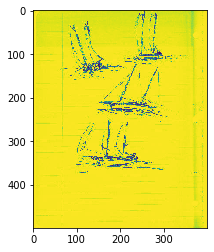

In [14]:
plt.imshow(y[1,:,:,:].reshape(500,400))

In [9]:
tf.__version__

'2.3.0'

# 3 SELECTIONAL AUTOENCODER model
Selectional Auto-Encoder (SAE)
The hierarchy of layers of our SAE consists of a series of convolutional plus pooling layers, until an intermediate layer in which meaningful representations of the input are attained. As these layers are applied, filters are able to relate parts of the image that were initially far apart. It then follows a series of convolutional plus upsampling layers that reconstruct the image up to the same 200 input size. The last layer consists of a set of neurons with sigmoid activation that predict a value in the range of [0, 1], depending on the selectional level for the corresponding input feature. 

200 epochs maximum
patience = 5
used grid search to tune hyper parameters?
batch size = 8
results + F measure (F score?)



In [ ]:
# input_img = image_to_predict.reshape(*image_to_predict.shape,1)# adapt this if using `channels_first` image data format
# input_img.shape


In [ ]:
#SET UP TENSORBOARD



In [16]:
# *SET UP TENSORBOARD**

#old version
# checkpoint_filepath = './tmp/checkpoint'
# tensorboard = TensorBoard(log_dir="./logs",
#     write_graph=True,
#     write_images=True)
#model_cp = ModelCheckpoint(filepath=checkpoint_filepath)

#METRICS = [ metrics.CategoricalAccuracy(name='ACCURACY'),
#             metrics.AUC(name='AUC',curve='ROC', multi_label=False),
#            metrics.SensitivityAtSpecificity(0.5, name='Sens@Spec'),
#            metrics.SpecificityAtSensitivity(0.5, name='Spec@Sens')]
# new tensorflow
#METRICS = [ metrics.Accuracy(name='ACCURACY'),
          # metrics.AUC(name='AUC', curve='ROC', multi_label=False)]


METRICS = [ metrics.Accuracy(name='ACCURACY')]



#model.compile(loss = 'mse', optimizer = 'adam', metrics=METRICS)


#updated tensorboard
checkpoint_filepath = './tmp/checkpoint'
tensorboard = TensorBoard(log_dir="./logs",
                          
                        histogram_freq=2,
                        write_graph=True,
                        write_images=True,
                        update_freq="epoch",
                        profile_batch=2,
                        embeddings_freq=0,
                        embeddings_metadata=None)

#early_stopping = EarlyStopping(monitor='val_loss', restore_best_weights=True)
#early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model_cp = ModelCheckpoint(filepath=checkpoint_filepath, monitor = 'val_loss', save_best_only=True)

#early_stopping = EarlyStopping(monitor='loss',patience=10)

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

# Model 2.A Research paper FULL version

In [ ]:
# MODEL A. straight from the keras website (used to model the below one) **DOESNT WORK**

 
# input_img = Input(shape=(500,400,1))
# x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)

# # at this point the representation is (4, 4, 8) i.e. 128-dimensional

# x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(16, (3, 3), activation='relu')(x)
# x = UpSampling2D((2, 2))(x)

# x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(16, (3, 3), activation='relu')(x)
# x = UpSampling2D((2, 2))(x)

# decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# autoencoder = Model(input_img, decoded)
# autoencoder.summary()
#autoencoder.compile(optimizer='adam', loss='mse', metrics=METRICS)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') #original compile from tensorflow


# Model 2.B Sparse

In [1]:
#MODEL B. Bare bones *WORKS*BUT*SIMPLE


input_img = Input(shape=(500,400,1)) 

x = Conv2D(32, (3, 3), activation='relu')(input_img)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

#x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu')(x)
#encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Dense(128)(x) 

#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(16, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)

#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(16, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
x= Conv2DTranspose(32,(3,3), activation='relu')(x)
decoded = Conv2DTranspose(1, (3, 3), activation='linear', padding='same')(x)

autoencoder_B = Model(input_img, decoded)
autoencoder_B.summary()
autoencoder_B.compile(optimizer='adam', loss='mse', metrics=METRICS)


NameError: name 'Input' is not defined

In [34]:
#FIT MODEL- ran 200 epochs

history_B = autoencoder_B.fit(x=X, y=y, batch_size=15, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping, model_cp], validation_split=0.2)


Epoch 1/100
36/36 [==============================] - 28s 781ms/step - loss: 20.7978 - ACCURACY: 1.6636e-06 - val_loss: 12.7830 - val_ACCURACY: 9.3284e-07
Epoch 2/100
36/36 [==============================] - 28s 779ms/step - loss: 11.4375 - ACCURACY: 2.9533e-06 - val_loss: 15.2712 - val_ACCURACY: 5.5970e-07
Epoch 3/100
36/36 [==============================] - 28s 779ms/step - loss: 11.6407 - ACCURACY: 3.4486e-06 - val_loss: 11.5307 - val_ACCURACY: 7.7612e-06
Epoch 4/100
36/36 [==============================] - 28s 779ms/step - loss: 15.9951 - ACCURACY: 2.0187e-06 - val_loss: 30.4971 - val_ACCURACY: 1.4925e-07
Epoch 5/100
36/36 [==============================] - 28s 780ms/step - loss: 23.5762 - ACCURACY: 8.5047e-07 - val_loss: 15.2998 - val_ACCURACY: 2.2388e-07
Epoch 6/100
36/36 [==============================] - 28s 778ms/step - loss: 11.2005 - ACCURACY: 2.9720e-06 - val_loss: 13.6607 - val_ACCURACY: 2.6119e-07
Epoch 7/100
36/36 [==============================] - 28s 779ms/step - loss: 

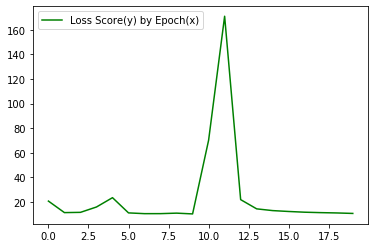

In [45]:
plt.plot(history_B.history['loss'], color='green', label='Loss Score(y) by Epoch(x)')
# , marker ='o', linestyle='dashed',
plt.legend()

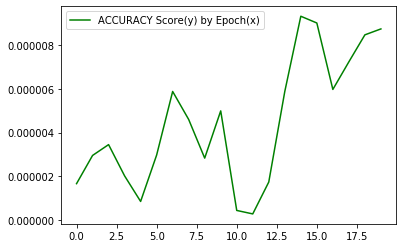

In [47]:
plt.plot(history_B.history['ACCURACY'],  color='green', label='ACCURACY Score(y) by Epoch(x)')
plt.legend()

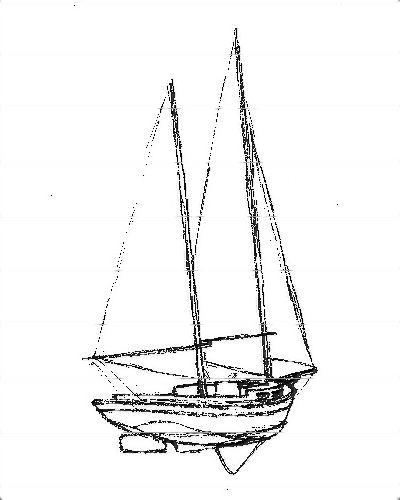

In [48]:
result = autoencoder_B.predict(X)
result[result>255]=255
result[result<0] = 0
result = result[0].astype(np.uint8).reshape(500,400)
Image.fromarray(result)

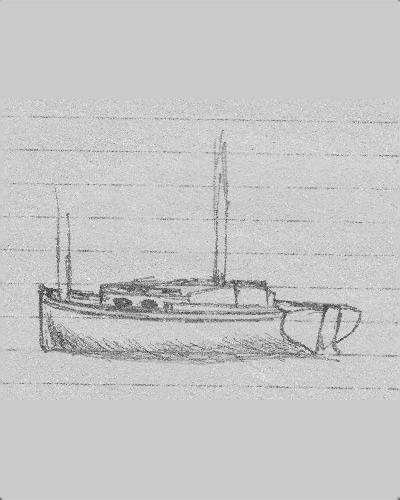

In [49]:
# See how it predicts on unseen image
result = autoencoder_B.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result[result>255]=255
result[result<0] = 0
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result) 


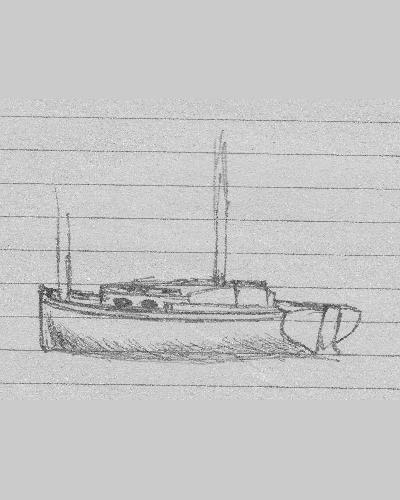

In [50]:
#original
Image.fromarray(image_to_predict)

# Model 2.C Intermediate Model

In [51]:


#MODEL C. Megans


input_img = Input(shape=(500,400,1)) 

x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)

# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)


x = Dense(128)(x) #bottleneck

# x = UpSampling2D((2, 2))(x)
# x = Conv2DTranspose(8, (3, 3), activation='relu',  padding='same')(x)


# x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32,(3,3), activation='relu', padding='same')(x)

decoded = Conv2DTranspose(1, (3, 3), activation='linear', padding='same')(x)

autoencoder_C = Model(input_img, decoded)
autoencoder_C.summary()
autoencoder_C.compile(optimizer='adam', loss='mse', metrics=METRICS)


Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 500, 400, 1)]     0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 498, 398, 32)      320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 249, 199, 32)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 249, 199, 16)      4624      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 125, 100, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 123, 98, 8)        1160      
_________________________________________________________________
dense_8 (Dense)              (None, 123, 98, 128)    

In [52]:

history_C = autoencoder_C.fit(x=X, y=y, batch_size=15, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping, model_cp], validation_split=0.2 )


Epoch 1/100
36/36 [==============================] - 11s 315ms/step - loss: 14188.5693 - ACCURACY: 2.0105e-06 - val_loss: 1664.7759 - val_ACCURACY: 0.0000e+00
Epoch 2/100
36/36 [==============================] - 11s 298ms/step - loss: 837.1965 - ACCURACY: 4.0187e-07 - val_loss: 519.7948 - val_ACCURACY: 4.4776e-07
Epoch 3/100
36/36 [==============================] - 11s 298ms/step - loss: 377.1719 - ACCURACY: 2.5607e-06 - val_loss: 285.8929 - val_ACCURACY: 1.2313e-06
Epoch 4/100
36/36 [==============================] - 11s 298ms/step - loss: 251.4085 - ACCURACY: 1.0000e-06 - val_loss: 226.7372 - val_ACCURACY: 3.0597e-06
Epoch 5/100
36/36 [==============================] - 11s 299ms/step - loss: 214.6790 - ACCURACY: 1.5514e-06 - val_loss: 206.8071 - val_ACCURACY: 1.2313e-06
Epoch 6/100
36/36 [==============================] - 11s 298ms/step - loss: 200.1985 - ACCURACY: 4.8318e-06 - val_loss: 193.6118 - val_ACCURACY: 2.2015e-06
Epoch 7/100
36/36 [==============================] - 11s 299m

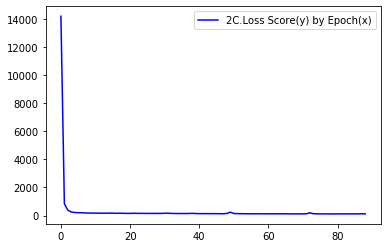

In [65]:
plt.plot(history_C.history['loss'], color='blue', label='2C.Loss Score(y) by Epoch(x)')
plt.legend()

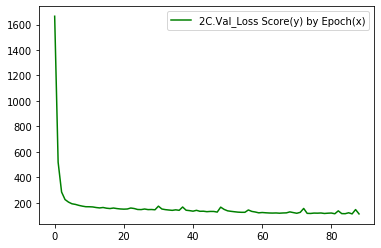

In [66]:
plt.plot(history_C.history['val_loss'], color='green', label='2C.Val_Loss Score(y) by Epoch(x)')
plt.legend()

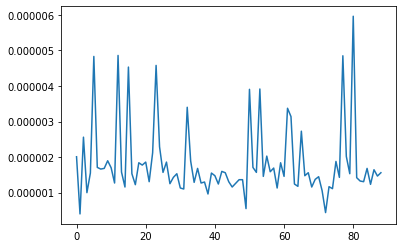

In [63]:
plt.plot(history_C.history['ACCURACY'])

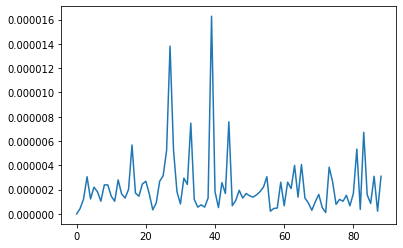

In [64]:
plt.plot(history_C.history['val_ACCURACY'])

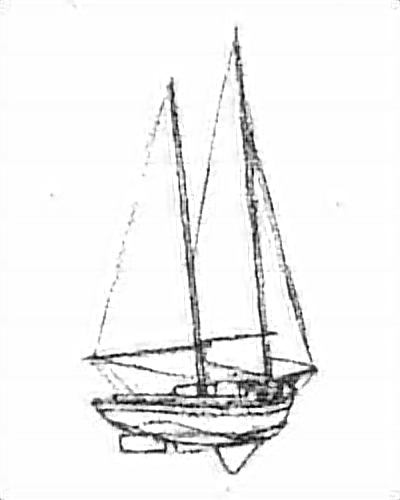

In [68]:
result = autoencoder_C.predict(X)
result[result>255]=255
result[result<0] = 0
result = result[0].astype(np.uint8).reshape(500,400)
Image.fromarray(result)

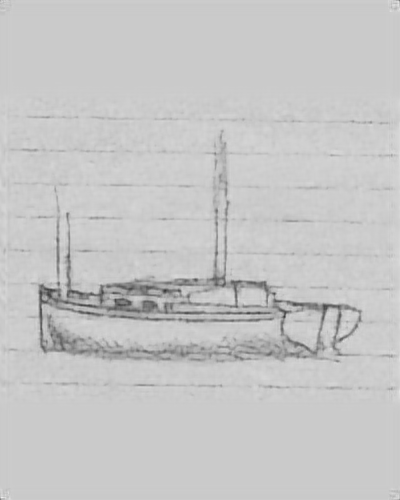

In [69]:
# See how it predicts on unseen images
result = autoencoder_C.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result[result>255]=255
result[result<0] = 0
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

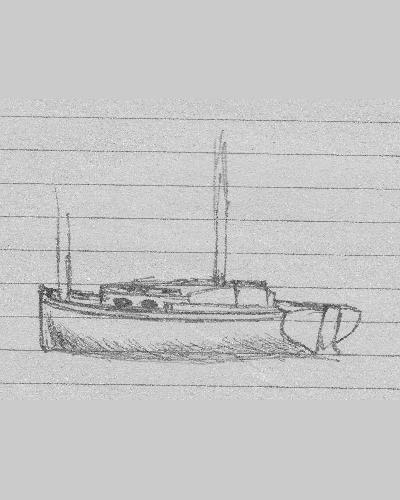

In [23]:
#original
Image.fromarray(image_to_predict)


# Model 2.D experimental
* change the end to sigmoid and linear (all combo) - worse
* added 2 more linear activations
* change optimizer
* add more dense layers


In [75]:
#MODEL D. 
input_img = Input(shape=(500,400,1))

x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='linear', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu')(x)


x = Dense(128,  activation='relu')(x)
# model.add(Dense(64,  activation='relu'))
x = Dense(2,    activation='linear', name="bottleneck")(x)
# model.add(Dense(64,  activation='relu'))
x = Dense(128,  activation='relu')(x)

# =====> prior dense layer
# # x = MaxPooling2D((2, 2), padding='same')(x)
# # x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# # x = MaxPooling2D((2, 2), padding='same')(x)
# x = Dense(128)(x) #bottleneck
# # x = UpSampling2D((2, 2))(x)
# # x = Conv2DTranspose(8, (3, 3), activation='relu',  padding='same')(x)
# # x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='linear', padding='same')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32,(3,3), activation='relu', padding='same')(x)

decoded = Conv2DTranspose(1, (3, 3), activation='linear', padding='same')(x)

autoencoder_D = Model(input_img, decoded)
autoencoder_D.summary()
autoencoder_D.compile(optimizer='adam', loss='mse', metrics=METRICS)

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 500, 400, 1)]     0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 498, 398, 32)      320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 249, 199, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 249, 199, 16)      4624      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 125, 100, 16)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 123, 98, 8)        1160      
_________________________________________________________________
dense_9 (Dense)              (None, 123, 98, 128)    

In [76]:
history_D = autoencoder_D.fit(x=X, y=y, batch_size=15, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping, model_cp], validation_split=0.2 )

Epoch 1/100
36/36 [==============================] - 12s 331ms/step - loss: 15440.4258 - ACCURACY: 2.5411e-07 - val_loss: 1649.8420 - val_ACCURACY: 1.1194e-06
Epoch 2/100
36/36 [==============================] - 11s 319ms/step - loss: 1528.3917 - ACCURACY: 4.5794e-07 - val_loss: 1480.3444 - val_ACCURACY: 1.1194e-07
Epoch 3/100
36/36 [==============================] - 12s 320ms/step - loss: 1311.4723 - ACCURACY: 5.7009e-07 - val_loss: 1289.4504 - val_ACCURACY: 3.3582e-07
Epoch 4/100
36/36 [==============================] - 12s 320ms/step - loss: 1103.1451 - ACCURACY: 6.4486e-07 - val_loss: 1012.1519 - val_ACCURACY: 2.1642e-06
Epoch 5/100
36/36 [==============================] - 12s 321ms/step - loss: 797.8114 - ACCURACY: 8.8785e-07 - val_loss: 676.9857 - val_ACCURACY: 1.8657e-07
Epoch 6/100
36/36 [==============================] - 12s 320ms/step - loss: 527.9798 - ACCURACY: 5.7009e-07 - val_loss: 441.3250 - val_ACCURACY: 3.7313e-07
Epoch 7/100
36/36 [==============================] - 12

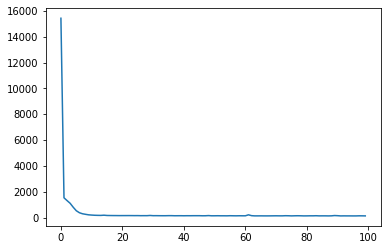

In [77]:
plt.plot(history_D.history['loss'])

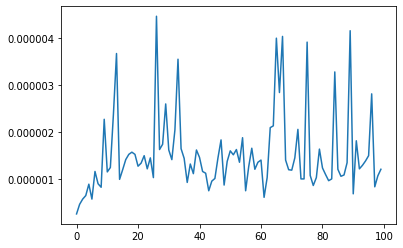

In [78]:
plt.plot(history_D.history['ACCURACY'])

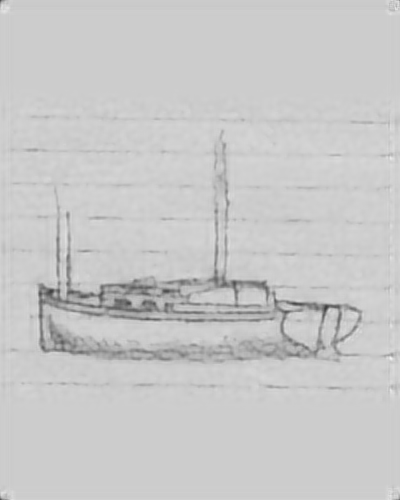

In [79]:
# See how it predicts on unseen images
result = autoencoder_D.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result[result>255]=255
result[result<0] = 0
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

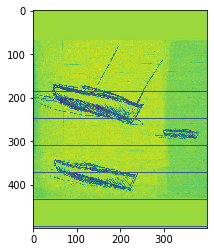

In [22]:
plt.imshow(X[2,:,:,:].reshape(500,400))

In [ ]:
plt.imshow(y[2,:,:,:].reshape(500,400))

In [ ]:
# result = model.predict(np.array([X]))
result = autoencoder.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

In [ ]:
plt.imshow(image_to_predict.reshape(500,400))

In [ ]:
result = autoencoder_B.predict(X)
result[result>255]=255
result[result<0] = 0
result = result[0].astype(np.uint8).reshape(500,400)
Image.fromarray(result)

In [ ]:
Image.fromarray(y[0].astype(np.uint8).reshape(500,400))

In [ ]:
Image.fromarray(X[0].astype(np.uint8).reshape(500,400))

In [ ]:
autoencoder.predict(X).min()

In [ ]:
autoencoder.predict(X).max()

In [ ]:
np.astype(auto)

# to run tensorboard

In [ ]:
!tensorboard --logdir=logs


In [ ]:
pip show tensorboard

In [ ]:
cd /home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/gpu/lib/python3.7/site-packages

In [ ]:
cd tensorboard

In [ ]:
python main.py --logdir=/path/to/log_file/

In [ ]:
# input_img = Input(shape=input_shape)
# x = Conv2D(256, 2, activation="swish", padding="same")(input_img)
# x = BatchNormalization()(x)
# x = Conv2D(128, 1, activation="swish", padding="same")(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D(2, padding="same")(x) 
# x = Conv2D(64, 1, activation="linear", padding="same")(x)
# x = BatchNormalization()(x)
# encoded = MaxPooling2D(2, padding="same")(x) 
# x = Conv2D(64, 1, activation="relu", padding="same")(x)
# x = BatchNormalization()(x)
# # x = UpSampling2D(2)(x)
# # x = Dropout(0.5)(x)
# x = Conv2D(128, 1, activation="relu", padding="same")(x)
# x = BatchNormalization()(x)
# x = UpSampling2D(2)(x)
# x = Conv2D(256, 2, activation="relu", padding="same")(x)
# x = BatchNormalization()(x)
# decoded = Conv2D(1, 1, activation="linear", padding='same')(x)
# autoencoder = Model(input_img, decoded)
# autoencoder.summary()

In [ ]:
#to create all images with random line widths and depth - only need to do once

# for image in os.listdir('Data/Unruled'):

#     y=np.array((Image.open(f'Data/Unruled/{image}')))
#     X = np.array(y)
#     X[::40+np.random.randint(-20,20),:] = 80+np.random.randint(-60, 130)
#     pil_X = Image.fromarray(X)
#     pil_X.save(f'Data/computer_generated_lines/lined_{image}')
